<a href="https://colab.research.google.com/github/clzndyal1/git_test/blob/master/18_Deep_Learning_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Embedding, LSTM, Activation, Conv1D, MaxPooling1D
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist, reuters, imdb
from tensorflow.keras.utils import to_categorical  #one-hot encoding과 같은 결과 반환
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence

import numpy as np, array
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
#로이터 뉴스 데이터 load, 뉴스기사, 분류
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [3]:
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스기사')
print(len(X_test), '테스트용 뉴스기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스기사
2246 테스트용 뉴스기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
from tensorflow.keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

y= to_categorical(y_train, category)


In [45]:
y_train[:5]
y[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 

In [7]:
model = Sequential()
model.add(Embedding(1000, 100))   #1000, 기사당 단어수 100
model.add(LSTM(100, activation ='tanh'))   #LSTM으로 RNN구현
model.add(Dense(46, activation = 'softmax'))
model.summary()

model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])   #sparse = one_hot 인코딩을 안쓰고 1,2,3,4로 쓰겠다. 문자는 안돼고 숫자만 가능


early_stopping = EarlyStopping(monitor='val_loss', patience=5)
hist = model.fit(X_train, y_train, epochs=200, batch_size=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

print('\n Test Accurracy : %.4d' %(model.evaluate(X_test, y_test)[1]))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         100000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
450/450 [==============================] - 47s 98ms/step - loss: 2.1756 - accuracy: 0.4383 - val_loss: 1.8206 - val_accuracy: 0.5329
Epoch 2/200
450/450 [==============================] - 42s 93ms/step - loss: 1.7438 - accuracy: 0.5488 - val_loss: 1.7460 - val_accuracy: 0.5677
Epoch 3/200
450/450 [=

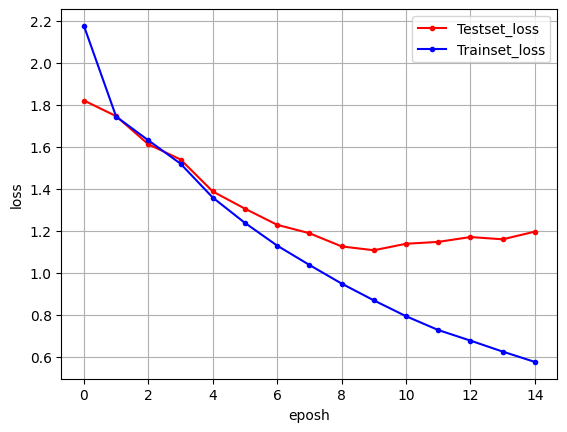

In [10]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker ='.', c='r', label='Testset_loss')
plt.plot(x_len, y_loss, marker ='.', c='b', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('eposh')
plt.ylabel('loss')
plt.show()